# Association Between Final Grade in Math and Family/Social Life Aspects of Students in Secondary Education in Portugal - Research Paper

## Introduction

The dataset "Student Performance" created by Paulo Cortez and Alice Silva was collected during the 2005-2006 school year from the public schools Gabriel Pereira and Mousinho da Silveira in Portugal, consisting of 395 observations. In total, there are 32 explanatory variables and the response variable: the final grade of a participant in Mathematics. It has both continuous and categorical attributes and addresses classification tasks.

Our group will focus on students' performance, particularly in mathematics, in secondary education where information such as personal, family, and school aspects were collected using school reports and questionnaires. 

 **Research Question**: Which aspects of family and social life are significantly associated with the final grade in Mathematics? 

To answer this question, we will examine ten possible covariates that may affect a student's final grade in mathematics. This data can be accessed from ttps://archive.ics.uci.edu/dataset/320/student+performance 

Reference:
Cortez, P., & Silva, A. M. G. (2008). Using data mining to predict secondary school student performance. In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Annual Future Business Technology Conference, Porto, 5-12. 

|Variable|Unit|Values|
|--------|----|---------------|
|sex: student's sex|NA|'F' = female; 'M' = male|
|age: student's age|years|integers from 15 to 22|
|Pstatus: parent's cohabitation status|NA|'T' = living together; 'A' = apart|
|Medu: mother's education|NA|0 = none; 1 = primary education (4th grade); 2 = (5th to 9th grade); 3 = secondary education; 4 = higher education|
|Fedu: father's education|NA|0 = none; 1 = primary education (4th grade); 2 = (5th to 9th grade); 3 = secondary education; 4 = higher education|
|activities: extracurricular activities|NA|0 = no; 1 = yes|
|freetime: free time after school|NA|from 1 = very low to 5 = very high|
|absences: number of school absences|NA|0 to 93|
|G1: first period grade|NA|0-20|
|G2: first period grade|NA|0-20|

**Table 0.1: List of Variable Names**

## Methods

In [1]:
Our objective is to find the covariates that best explain a student's final grade. The measures we will take to do this are as follows:
1. Read in and tidy the dataset: After loading in the dataset, it must be tidied.
2. Visualize the dataset: Create some simple scatterplots and boxplots to understand potential relationships between variables.
3. Perform stepAIC: Use AIC to find the best additive model, based on the eight possible covariates.
4. Include Interaction: Include interaction in our best additive model to determine if an interactive model may be more accurate in explaining students' final grades.
5. Residual Plots and Normality Plots: Validate Assumptions.
6. Discussion of results.

ERROR: Error in parse(text = input): <text>:1:5: unexpected symbol
1: Our objective
        ^


## Analysis

### Dataset and Analysis Preparation

In [1]:
install.packages("leaps") # Run this if an installation of leaps is required
install.packages("patchwork") # Run this if an installation of Patchwork is required

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)



In [24]:
library(leaps)
library(tidyverse)
library(dplyr)
library(car)
library(MASS)
library(ggplot2)
library(patchwork)
options(repr.plot.width=12, repr.plot.height=5)

In [25]:
studentData <- read.table("student-mat.csv", sep=";", header=TRUE)
head(studentData)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [26]:
# Extract the explanatory terms and the response
studentData <- studentData[, c('sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'activities', 'freetime', 'absences', 'G1', 'G2', 'G3')]

In [27]:
# Check for missing data to handle
sum(is.na(studentData))

[1] 0

We also want to distinguish each variable as numeric or a factor in this study. Sex, Pstatus, and activities are factors due to their binary nature. Medu and Fedu are decided to be factors since they use numbers to represent categorical education levels. Freetime is a rating system, but is numeric due to its ordinal nature. Age, absences, and G3 are numeric in nature. 

In [28]:
studentData <- studentData %>%
    mutate(sex = as.factor(sex), 
           age = as.numeric(age),
           Pstatus = as.factor(Pstatus), 
           Medu = as.numeric(Medu),
           Fedu = as.numeric(Fedu),
           activities = as.factor(activities),
           freetime = as.numeric(freetime), 
           absences = as.numeric(absences), 
           G1 = as.numeric(G1),
           G2 = as.numeric(G2),
           G3 = as.numeric(G3))
head(studentData)

,sex,age,Pstatus,Medu,Fedu,activities,freetime,absences,G1,G2,G3
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,18,A,4,4,no,3,6,5,6,6
2,F,17,T,1,1,no,3,4,5,5,6
3,F,15,T,1,1,no,3,10,7,8,10
4,F,15,T,4,2,yes,2,2,15,14,15
5,F,16,T,3,3,no,3,4,6,10,10
6,M,16,T,4,3,yes,4,10,15,15,15


### Preliminary Visualizations and Summaries

Some basic summaries and statistics can be generated with simple R commands.

In [29]:
summary(studentData)

 sex          age       Pstatus      Medu            Fedu       activities
 F:208   Min.   :15.0   A: 41   Min.   :0.000   Min.   :0.000   no :194   
 M:187   1st Qu.:16.0   T:354   1st Qu.:2.000   1st Qu.:2.000   yes:201   
         Median :17.0           Median :3.000   Median :2.000             
         Mean   :16.7           Mean   :2.749   Mean   :2.522             
         3rd Qu.:18.0           3rd Qu.:4.000   3rd Qu.:3.000             
         Max.   :22.0           Max.   :4.000   Max.   :4.000             
    freetime        absences            G1              G2       
 Min.   :1.000   Min.   : 0.000   Min.   : 3.00   Min.   : 0.00  
 1st Qu.:3.000   1st Qu.: 0.000   1st Qu.: 8.00   1st Qu.: 9.00  
 Median :3.000   Median : 4.000   Median :11.00   Median :11.00  
 Mean   :3.235   Mean   : 5.709   Mean   :10.91   Mean   :10.71  
 3rd Qu.:4.000   3rd Qu.: 8.000   3rd Qu.:13.00   3rd Qu.:13.00  
 Max.   :5.000   Max.   :75.000   Max.   :19.00   Max.   :19.00  
       G3    

In [30]:
str(studentData)

'data.frame':	395 obs. of  11 variables:
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : num  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ activities: Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 1 2 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ G1        : num  5 5 7 15 6 15 12 6 16 14 ...
 $ G2        : num  6 5 8 14 10 15 12 5 18 15 ...
 $ G3        : num  6 6 10 15 10 15 11 6 19 15 ...


However, these numbers may seem a little cryptic, so we follow with some visualizations that can better describe the data that we are working with.

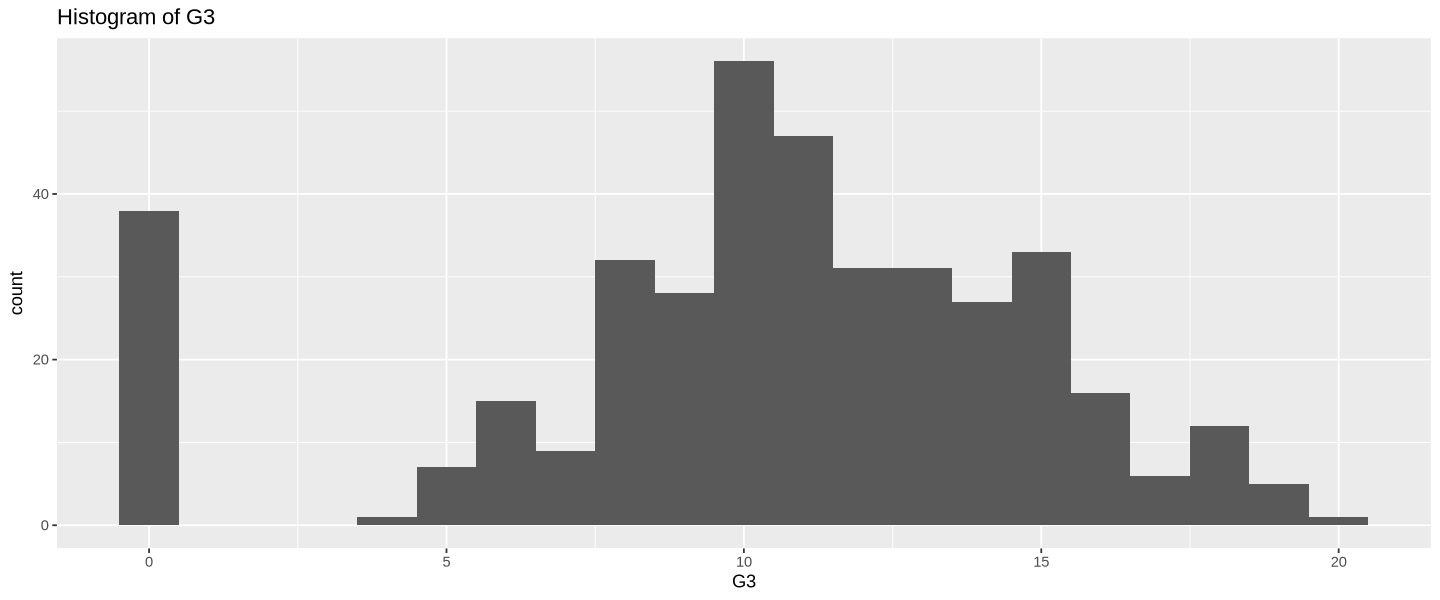

In [31]:
# Distribution of G3
ggplot(studentData, aes(x = G3)) +
  geom_histogram(binwidth=1) +
  ggtitle("Histogram of G3")

This histogram shows an approximately normal distribution about the mean (10.42), despite a number of outliers sitting at the left end of the distribution (with a G3 score of zero).

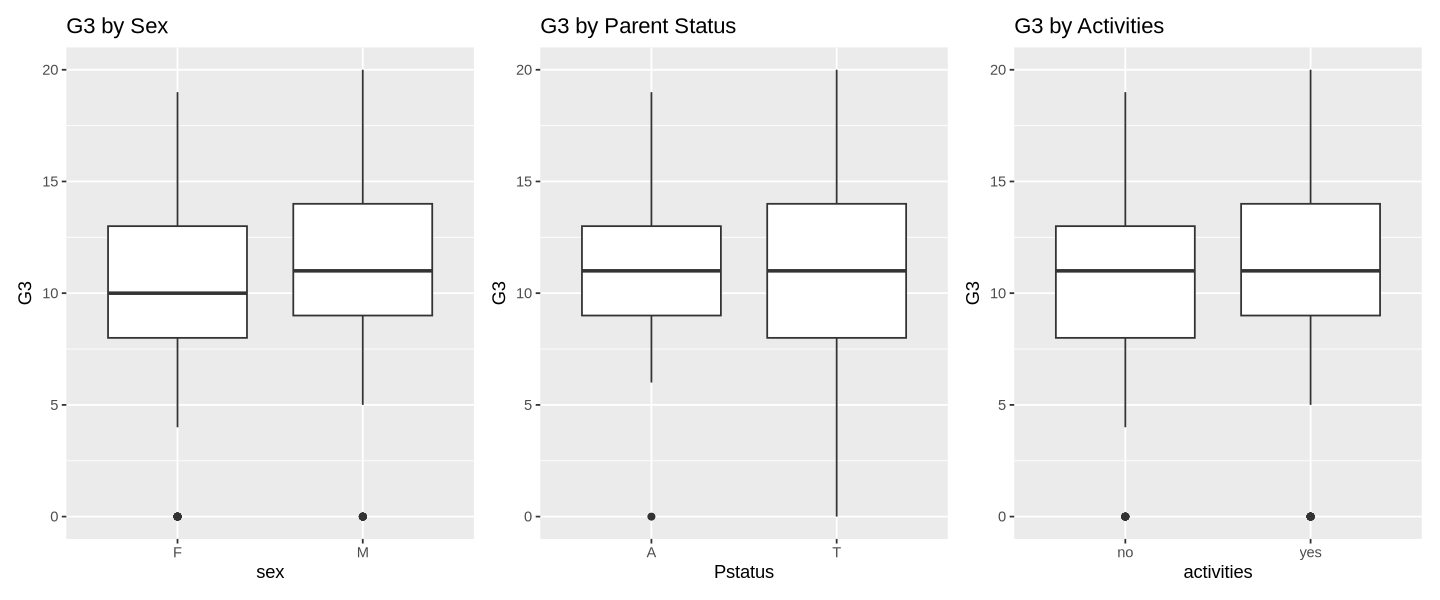

In [32]:
# Boxplots for binary explanatory variables
p1 <- ggplot(studentData, aes(x = sex, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Sex")
p2 <- ggplot(studentData, aes(x = Pstatus, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Parent Status")
p3 <- ggplot(studentData, aes(x = activities, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Activities")
(p1 | p2 | p3)

We can see that the median G3 score is identical among the two different Pstatuses; however, there is a much larger spread among the scores of those with the "T" Pstatus (which means that the parents are living together). For activities, we also see that the median score is the same for those that with or without extracurricular activities, although it seems that the two boxplots have different tails in their distributions. Finally, for the sex variable, it seems that the distribution is fairly similar, with male students having slightly higher G3 scores overall. There can be confounding variables that affect conclusions made solely based on these visualizations, however.

# NOTE THAT THIS NEEDS TO BE UPDATED DUE TO Medu AND Fedu being re-updated to as.numeric instead fo as.factor!!!!!

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”
Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


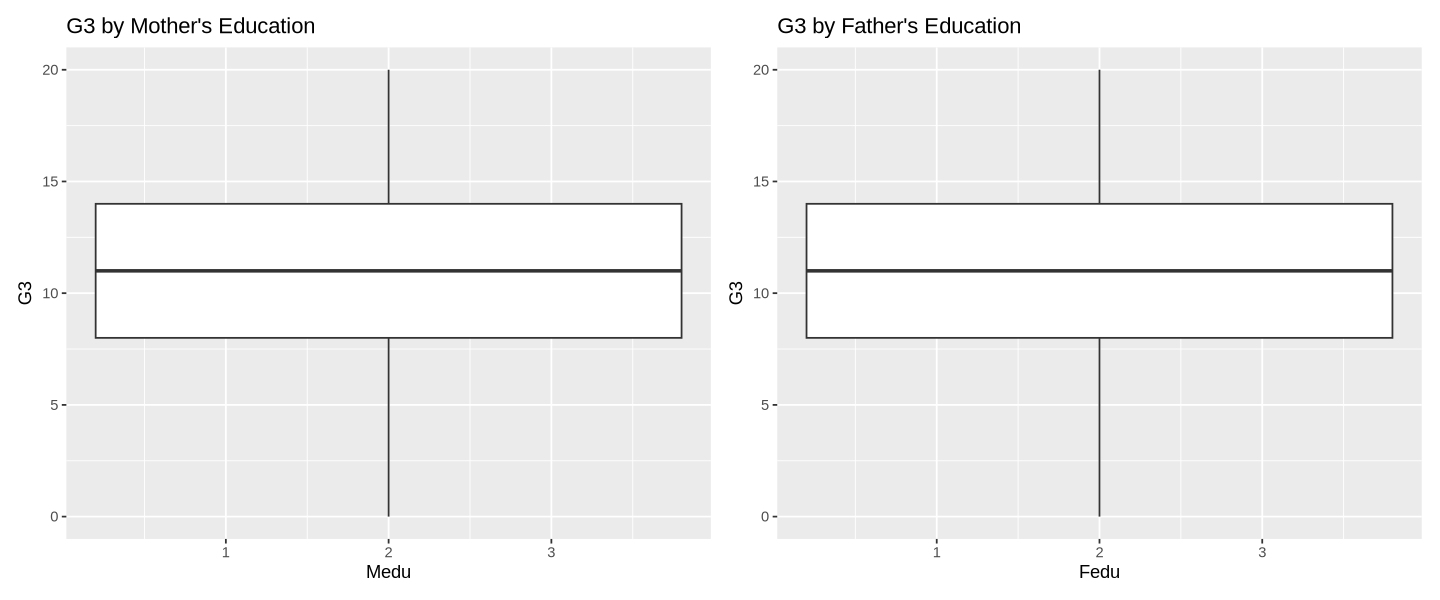

In [33]:
# Multi-level boxplots for Medu and Fedu factor variables
p4 <- ggplot(studentData, aes(x = Medu, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Mother's Education")
p5 <- ggplot(studentData, aes(x = Fedu, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Father's Education")
(p4 | p5)

The boxplots comparing G3 scores with the educational levels of both mothers (Medu) and fathers (Fedu) show a general upward trend in G3 as Medu/Fedu scores increase, with the exception of having a Medu or Fedu score of 0 (these individuals seems to have a fairly high G3 score, with lower spread as well). However, the boxplot doesn't show how many responses are in each Medu/Fedu level, which can be slightly misleading.

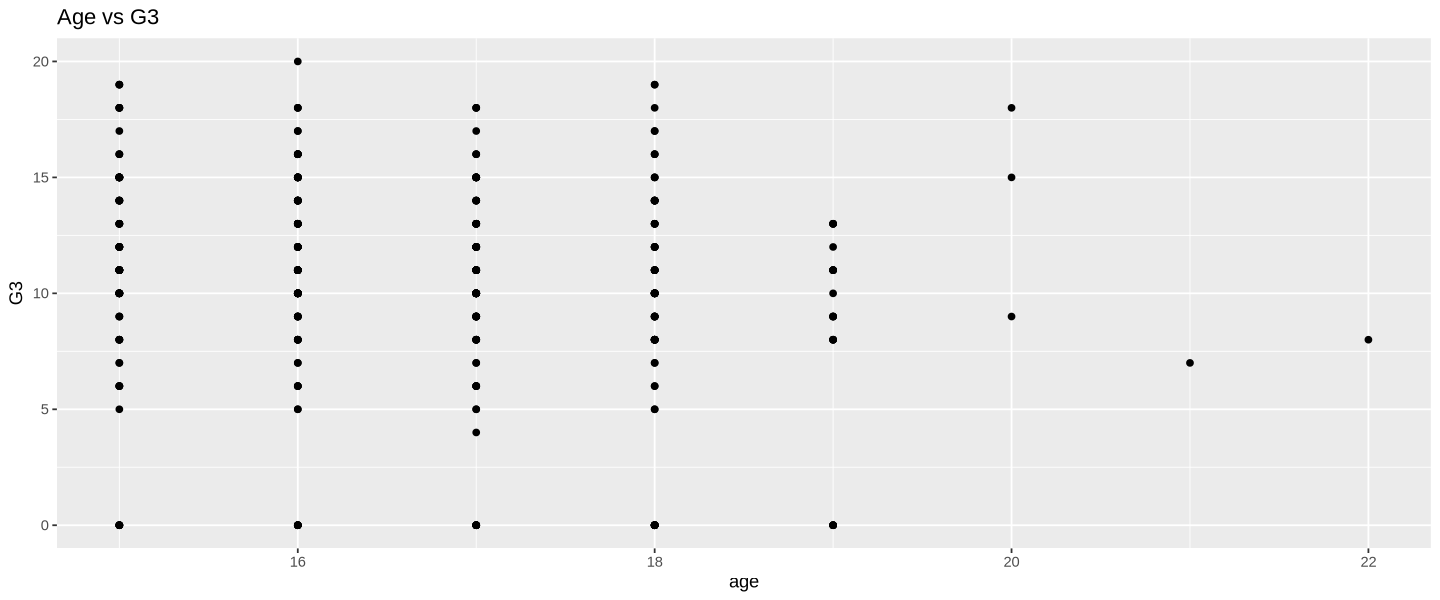

In [34]:
# Scatterplots for numeric data
# Age vs G3
p6 <- ggplot(studentData, aes(x = age, y = G3)) +
  geom_point() +
  ggtitle("Age vs G3")

# Freetime vs G3b
p7 <- ggplot(studentData, aes(x = freetime, y = G3)) +
  geom_point() +
  ggtitle("Freetime vs G3")

# absences vs G3
p8 <- ggplot(studentData, aes(x = absences, y = G3)) +
  geom_point() +
  ggtitle("Absences vs G3")
p6

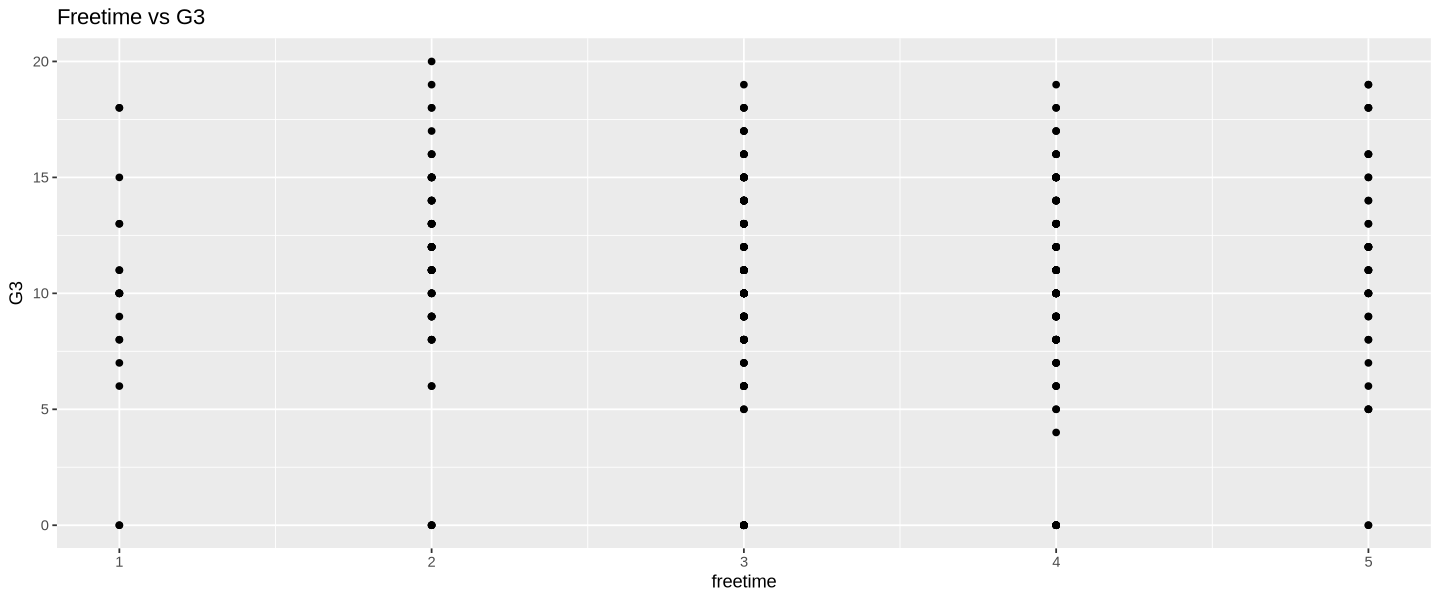

In [35]:
p7

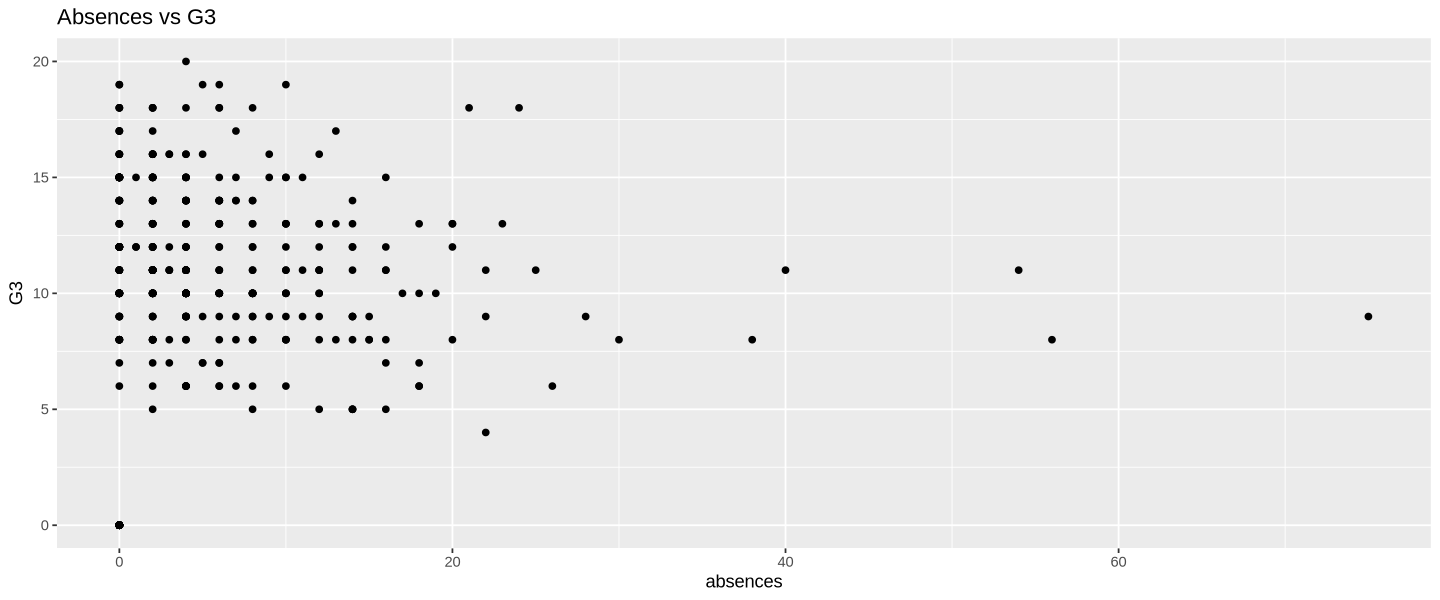

In [36]:
p8

These scatterplots do not show a clear linear relationship between a singular numeric explanatory variables and G3. We will further explore how a combination of these variables, as well as categorical covariates, may help us draw more thorough conclusions.

## Analysis

The initial part of the analysis is to check for correlation among the numeric covariates.

In [37]:
numeric_vars <- c("age", "freetime", "absences", "G1", "G2")
df_numeric <- studentData[, numeric_vars]

## Correlation check, round to 4 decimals
cor_matrix <- cor(df_numeric, use = "pairwise.complete.obs")
round(cor_matrix, 4)

,age,freetime,absences,G1,G2
age,1.0000,0.0164,0.1752,-0.0641,-0.1435
freetime,0.0164,1.0000,-0.0581,0.0126,-0.0138
absences,0.1752,-0.0581,1.0000,-0.0310,-0.0318
G1,-0.0641,0.0126,-0.0310,1.0000,0.8521
G2,-0.1435,-0.0138,-0.0318,0.8521,1.0000


It is clear from the correlation matrix that G1 and G2 are highly correlated, which tracks with the literature where the authors state a similar conclusion. For the initial model, we will remove these to estimate the total effect of the selected family and social variables on final grade, G3.

In [38]:
## Initial Model without G1 and G2
model_initial <- lm(G3 ~ . -G1 -G2, data = studentData)
summary(model_initial)


Call:
lm(formula = G3 ~ . - G1 - G2, data = studentData)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6126  -2.0261   0.4166   3.0659  10.1430 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.46946    3.33447   4.939 1.17e-06 ***
sexM           0.85511    0.46563   1.836  0.06706 .  
age           -0.49141    0.18308  -2.684  0.00759 ** 
PstatusT      -0.37294    0.75191  -0.496  0.62018    
Medu           0.71393    0.26710   2.673  0.00784 ** 
Fedu           0.08360    0.26544   0.315  0.75297    
activitiesyes -0.22241    0.45917  -0.484  0.62839    
freetime      -0.03720    0.23253  -0.160  0.87298    
absences       0.02446    0.02910   0.841  0.40112    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.453 on 386 degrees of freedom
Multiple R-squared:  0.07426,	Adjusted R-squared:  0.05508 
F-statistic: 3.871 on 8 and 386 DF,  p-value: 0.0002101


This model is a poor fit for the data, as the adjusted R-squared value (0.0537) indicates that a very low portion of the variance in G3 is explained by family and social covariates even when controlling for age and sex. Additionally, the magnitudes of the standard errors are high relative to the estimates, given that only 5.5% of the variation in G3 is explained.

`Sex`, `age`, and `Medu` (mother's education) are the only significant covariates here.
- For age, it suggests that older students are associated with lower G3 scores.
- For Medu, it suggests that mothers who are "more educated" (higher Medu) are associated with children with higher G3 scores.
- For sex, males are associated with slightly higher G3 scores relative to females.

In [39]:
## VIF check
round(vif(model_initial), 4)

sex        age    Pstatus       Medu       Fedu activities   freetime 
    1.0764     1.0842     1.0474     1.6985     1.6575     1.0494     1.0717 
  absences 
    1.0775

The VIF values do not surpass the threshold of 5, so there are no causes for concern of multicollinearity here. However, it is clear that the initial model does not explain the variation of G3 very well. To see why that is the case, we will fit another model with G1 and G2.

In [40]:
## Full Model including G1 and G2
model_full <- lm(G3 ~., data = studentData)
summary(model_full)


Call:
lm(formula = G3 ~ ., data = studentData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9134 -0.3894  0.3248  0.9719  3.7337 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.23228    1.47451   0.836 0.403830    
sexM           0.19048    0.19971   0.954 0.340774    
age           -0.20396    0.07932  -2.571 0.010504 *  
PstatusT      -0.13317    0.32169  -0.414 0.679127    
Medu           0.07550    0.11524   0.655 0.512773    
Fedu          -0.08901    0.11409  -0.780 0.435802    
activitiesyes -0.35574    0.19635  -1.812 0.070812 .  
freetime       0.10932    0.09955   1.098 0.272828    
absences       0.04180    0.01245   3.357 0.000867 ***
G1             0.17384    0.05608   3.100 0.002079 ** 
G2             0.96385    0.04976  19.371  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.904 on 384 degrees of freedom
Multiple R-squared:  0.8317,	Adjusted R-squared:  0.8273 


The full model exhibits a massive improvement in the adjusted R-squared (0.0537 to 0.8273), indicating prior grades (especially G2) are extremely predictive of the final grade G3. There is also a big decrease in the magnitudes of standard errors, which also improves our accuracy.

In this model, the significant covariates are `age`, `absences`, `G1`, and `G2`.
- For `age`, it suggests that older students are associated with lower G3 scores.
- For `absences`, it suggests that more absences are associated with higher G3 scores.
- For `G1` and `G2`, higher interim grades are associated with higher G3 scores.

More absences being associated with higher G3 scores is absurd. In our initial model, `absences` is not a significant covariate. Here, it may be because `G1` and `G2` are masking the true effect of `absences` as interim grades are largely associated with G3 scores.

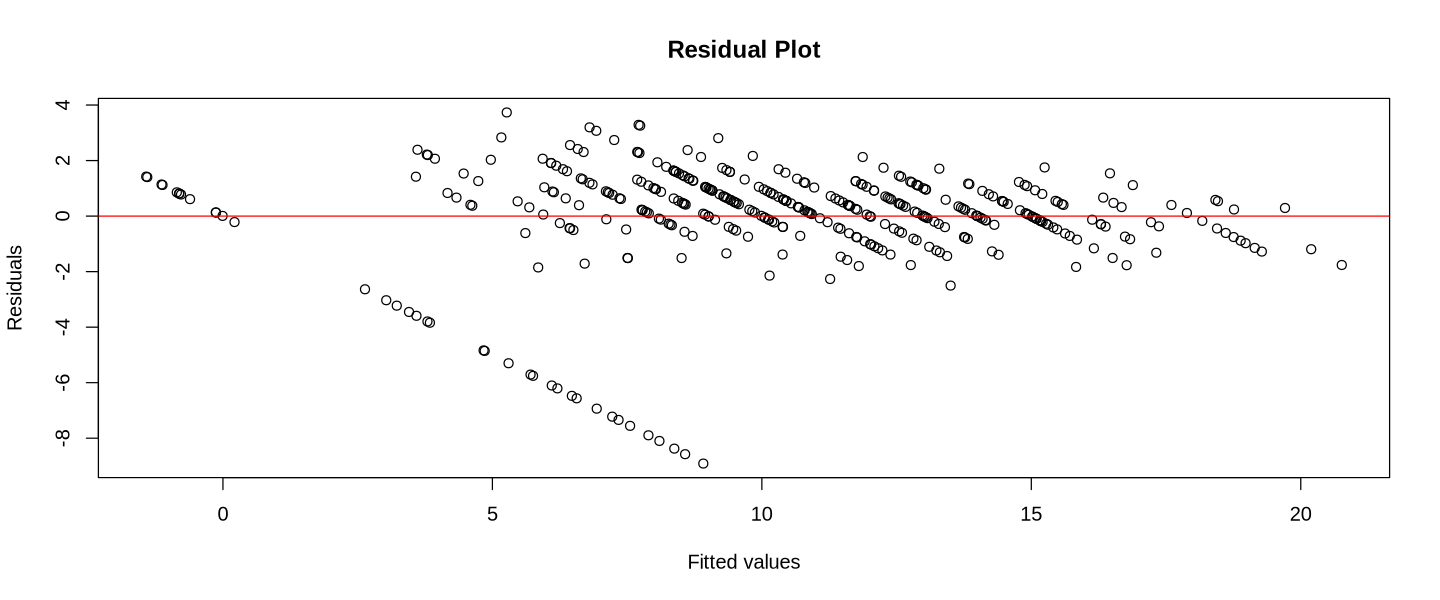

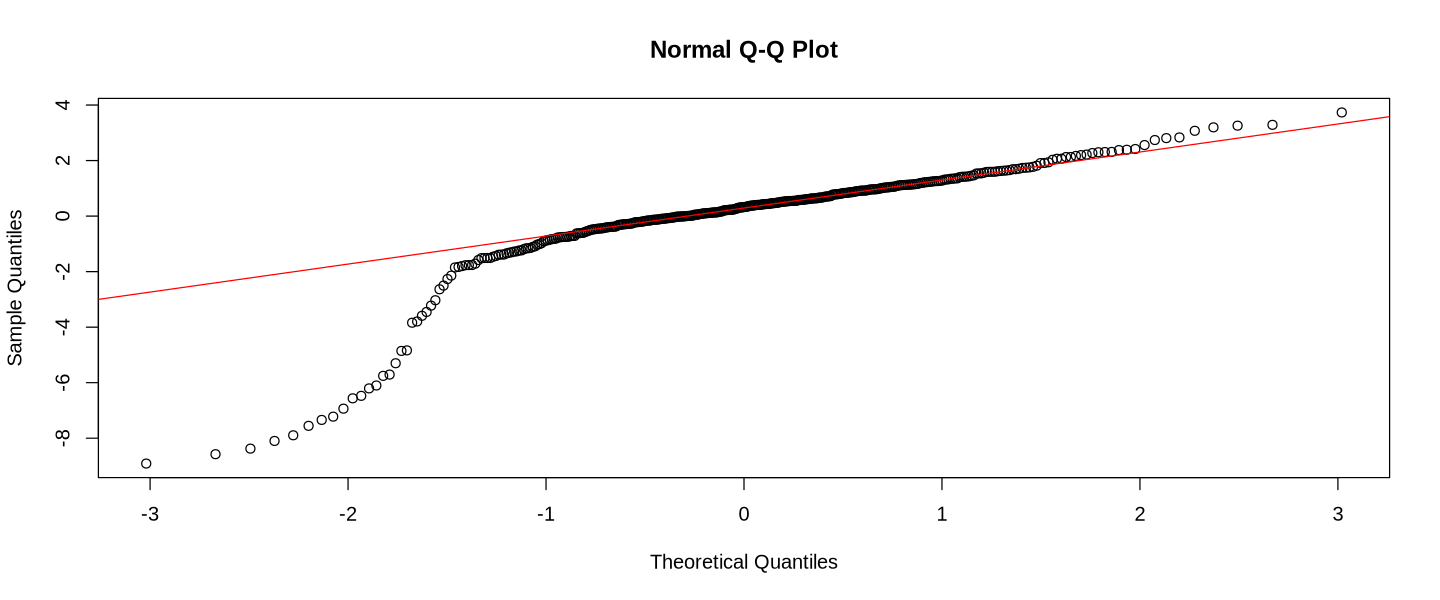

In [41]:
# Residual plot and QQ plot of model_full
res <- residuals(model_full)
fitted_vals <- fitted(model_full)

plot(fitted_vals, res, xlab = "Fitted values", ylab = "Residuals", main = "Residual Plot")
abline(h = 0, col = "red")

qqnorm(res, main = "Normal Q-Q Plot")
qqline(res, col = "red")

In [45]:
- For Residual Plot: the residuals show a certain pattern across fitted values, not entirely random, suggesting possible heteroscedasticity or model misspecification.
- For Normal QQ Plot: the residuals deviate from the straight line in the tails, especially in the lower left, indicating potential heavy tails or skewness; the normality assumption may not fully hold.

ERROR: Error in -"For Residual Plot: the residuals show a certain pattern across fitted values, not entirely random, suggesting possible heteroscedasticity or model misspecification.": invalid argument to unary operator


## Conclusion